In [1]:
from nltk.corpus import wordnet as wn
import nltk

In [4]:
wn.synset('matter.n.03').hypernyms()

[Synset('physical_entity.n.01')]

In [5]:
wn.synset('physical_entity.n.01').hypernyms()

[Synset('entity.n.01')]

In [6]:
wn.synset('entity.n.01').hypernyms()

[]

In [9]:
wn.synset('cocoa.n.01').hypernyms()[0].hypernyms()

[Synset('food.n.01'), Synset('liquid.n.01')]

In [11]:
wn.synset('substance.n.07').hypernyms()

[Synset('matter.n.03')]

In [14]:
wn.synset('substance.n.01').hypernyms()

[Synset('matter.n.03'), Synset('part.n.01')]

In [15]:
wn.synset('matter.n.03').hypernyms()

[Synset('physical_entity.n.01')]

In [17]:
a = [1, 2, 3]

In [18]:
a.append(4)

In [20]:
for x in a:
    print(x)
    if x == 3:
        a.append(5)

1
2
3
4
5


In [22]:
[[]]*5

[[], [], [], [], []]

In [20]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
# Hyperparameters

#concreteness_threshold = 2
concreteness_threshold = 7

# Number of positive examples we want for each classifier
#pos_count = 3
#neg_count = 9
#pos_count = 10
#neg_count = 20
pos_count = 15
neg_count = 40


test_pct = 0.33 #0.33

embedding_file = 'ddata/clip.bertvocab.embeddings.513.txt'
embedding_pickle = 'ddata/clip.bertvocab.embeddings.513.pkl'
concreteness_file = 'ddata/AC_ratings_google3m_koeper_SiW.csv'
concreteness_pickle = 'ddata/AC_ratings_google3m_koeper_SiW.pkl'

In [22]:
# wac2vec

if os.path.isfile(embedding_pickle):
    wac2vec = pickle.load(open(embedding_pickle, 'rb'))
else:
    with open(embedding_file) as f:
        f = f.readlines()
        f = [line.split() for line in f]
        wac2vec = {line[0]:np.array(line[1:], dtype=np.float32) for line in f}
        pickle.dump(wac2vec, open(embedding_pickle, "wb" ))

len(wac2vec)

30522

In [42]:
X_features = []
for word in list(wac2vec.keys())[7000:7600]:
    X_features.append(wac2vec[word])

In [43]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

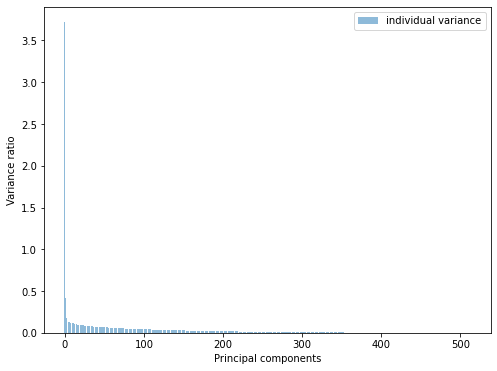

In [44]:
plt.figure(figsize=(8, 6))
plt.bar(range(513), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

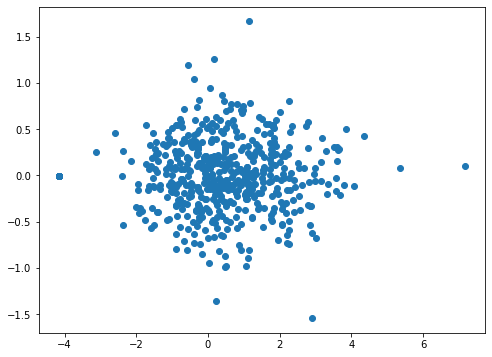

In [45]:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
#plt.scatter(x_3d[:,0], x_3d[:,5], c=list of colors?)
plt.scatter(x_3d[:,0], x_3d[:,5])
plt.show()

In [46]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single